# Week 3
## Data retrieval, preprocessing, and normalization for ML


## Basic Outline
  
* Where do data come from? Data retreival.
* Ideal datasets and data types
* Common wrangling needs and implementations

## Where did you get your data?



* Generated in-house (stored as CSVs, TSVs, SQL, proprietary, etc)

* Collaborators

* Public sources

## Scripting data retrieval improves reproducibility

In [2]:
# you may need to:
# !pip install requests

In [3]:
# Downloading a data file from a remote repository
import urllib

URL = "https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz"
FILENAME = "brca_protein_expression.tsv.gz"

urllib.request.urlretrieve(URL, FILENAME)

('brca_protein_expression.tsv.gz', <http.client.HTTPMessage at 0x10b7d1e80>)

* Scraping tools such as Mechanize and BeautifulSoup allow extraction of data from websites


In [4]:
import requests
# Retrieving data from a remote web service in JSON format that gets converted to a python structure:
def get_genome_sequence_ensembl(chromosome, start, end):
    """ API described here http://rest.ensembl.org/documentation/info/sequence_region"""
    url = 'https://rest.ensembl.org/sequence/region/human/{0}:{1}..{2}:1?content-type=application/json'.format(
        chromosome, start, end)
    r = requests.get(url, headers={"Content-Type": "application/json"}, timeout=10.000)
    if r.ok:
        return r.json()['seq']
print(get_genome_sequence_ensembl(7, 200000,200100))

TTCTTGACACTGATTGATCTGCCAAAAGGGGAAGAATGAGTCCAGCTAGAATCCAGGACTAACCAGCGGGTGAGCTTCAAGGAACAAAGGGCTTCCGCTGG



## Pandas covers most of the data retrieval needs

In [5]:
import pandas as pd

# Let's read with pandas
# Note that we do not even need to unzip the file before opening!
brca_data = pd.read_table(FILENAME, sep="\t")

brca_data.head(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


## Pandas can even retrieve from an SQL database directly

In [6]:
# you may need to 
!pip install sqlalchemy
!pip install pymysql

In [7]:
import sqlalchemy as sa
# Connect to UCSC genomic database
engine = sa.create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=sa.pool.NullPool)
# select 3 SNPs from Chromosome Y
pd.read_sql("SELECT * FROM snp147Common WHERE chrom='chrY' LIMIT 3", engine)

,bin,chrom,chromStart,chromEnd,name,score,strand,refNCBI,refUCSC,observed,...,locType,weight,exceptions,submitterCount,submitters,alleleFreqCount,alleles,alleleNs,alleleFreqs,bitfields
0,585,chrY,10020,10020,rs745593600,0,+,b'-',b'-',-/A/AAC,...,between,1,MixedObserved,1,"b'1000GENOMES,'",3,"b'-,A,AAC,'","b'4906.000000,10.000000,92.000000,'","b'0.979633,0.001997,0.018371,'",
1,585,chrY,10034,10036,rs201278642,0,+,b'CC',b'CC',-/CC,...,range,1,MixedObserved,2,"b'1000GENOMES,SSMP,'",2,"b'-,CC,'","b'369.000000,4637.000000,'","b'0.073711,0.926288,'",maf-5-some-pop
2,585,chrY,10051,10052,rs186434315,0,+,b'T',b'T',A/T,...,exact,1,,2,"b'1000GENOMES,SSMP,'",2,"b'A,T,'","b'1582.000000,3426.000000,'","b'0.315895,0.684105,'","maf-5-some-pop,maf-5-all-pops"



## Pandas dataframes

* Dataframes are convenient containers for mixed data types

* Pandas is *incredibly useful* for data wrangling

* sklearn is happy to accept Pandas dataframes as input

* Pandas is built for exploratory analysis, visualization and stat tests / ML 

In [8]:
brca_data.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [9]:
%matplotlib inline

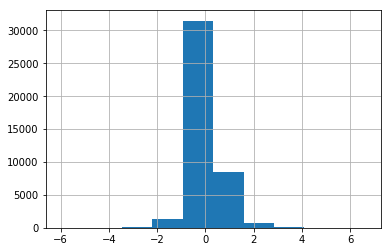

In [10]:
#normalzied expression level display
brca_data.normalized_expression_level.hist()

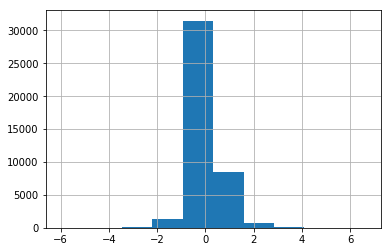

In [11]:
# Plotting boilerplate
import matplotlib.pyplot as plt
%matplotlib inline

brca_data['normalized_expression_level'].hist()

## Pre-processing a dataset: when are ready for ML?

* Ideally, data are organized as a table: examples-vs-features

* Data from multiple sources are combined

* Missing data are handled

* Features have been combined and manipulated as needed

* Any data that need to be normalized have been normalized

* Data are of the correct type (e.g. categorical vs continuous, boolean vs int)

## Let's have a look at Boston housing prices

In [12]:
boston = pd.read_csv("boston_data.csv")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* Data from multiple sources are combined
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Combining data from multiple sources

In [13]:
boston_second_floor = pd.read_csv("boston_second_floor.csv")
boston_second_floor.head()
#boston.head()

,Id,2ndFlrSF
0,2,0
1,1,854
2,3,866
3,4,756
4,5,1053


## Combining data from multiple sources

In [14]:
boston.head(1)

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500


In [15]:
boston_second_floor.head(1)

,Id,2ndFlrSF
0,2,0


In [16]:
# Let's combine boston and boston second floor
boston = pd.merge(boston, boston_second_floor, on="Id")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053


In [17]:
# Let's add some additional data
boston3 = pd.read_csv("boston_additional.csv")
boston3.head()

,Id,CentralAir,1stFlrSF,SaleCondition,SalePrice,LotFrontage
0,44,Y,938,Normal,130250,NaN
1,45,Y,1150,Normal,141000,70.0
2,46,Y,1752,Normal,319900,61.0


## Thus far

In [18]:
boston.tail(10)
#boston.shape
#boston.tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
33,34,70.0,Y,1700,Normal,165500,0
34,35,60.0,Y,1561,Normal,277500,0
35,36,108.0,Y,1132,Normal,309000,1320
36,37,112.0,Y,1097,Normal,145000,0
37,38,74.0,Y,1297,Normal,153000,0
38,39,68.0,Y,1057,Abnorml,109000,0
39,40,65.0,N,1152,AdjLand,82000,0
40,41,84.0,Y,1324,Abnorml,160000,0
41,42,115.0,Y,1328,Normal,170000,0
42,43,NaN,Y,884,Normal,144000,0


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Missing data
There are a number of ways to handle missing data:

* Drop all records with a value missing (simplest, but can lead to bias)
* Substitute all missing values with an approximated value (usually depends on data and algorithm)
* Add additional feature indicating when a value is missing

## Missing data

In [19]:
boston.isnull()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [20]:
# Drop all records with missing data
#boston.isnull().tail()
# boston.isnull().sum()
# boston.isnull().sum().sum()
#boston.tail()
#boston.dropna().tail()
boston.isnull().sum()

Id               0
LotFrontage      7
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [21]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 7 columns):
Id               43 non-null int64
LotFrontage      36 non-null float64
CentralAir       43 non-null object
1stFlrSF         43 non-null int64
SaleCondition    43 non-null object
SalePrice        43 non-null int64
2ndFlrSF         43 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ KB


In [22]:
# Substitute missing values
# boston.fillna("Value!").tail()
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
38,39,68,Y,1057,Abnorml,109000,0
39,40,65,N,1152,AdjLand,82000,0
40,41,84,Y,1324,Abnorml,160000,0
41,42,115,Y,1328,Normal,170000,0
42,43,Value2!,Y,884,Normal,144000,0


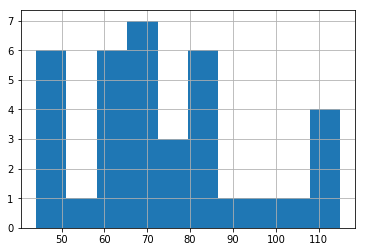

In [23]:
boston.LotFrontage.hist()

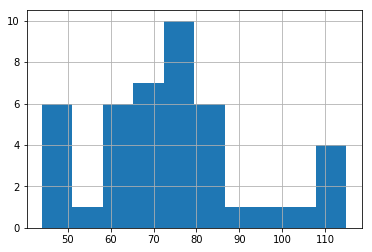

In [24]:
boston.LotFrontage.fillna(boston.LotFrontage.mean()).hist()

In [25]:
boston.shape

(43, 7)

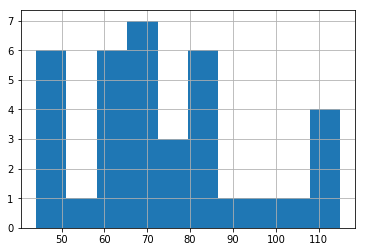

In [26]:
boston.dropna(axis=0).LotFrontage.hist()

In [27]:
boston.loc[boston.LotFrontage.isna()]

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
7,8,NaN,Y,1107,Normal,200000,983
12,13,NaN,Y,912,Normal,144000,0
14,15,NaN,Y,1253,Normal,157000,0
16,17,NaN,Y,1004,Normal,149000,0
24,25,NaN,Y,1060,Normal,154000,0
31,32,NaN,Y,1228,Normal,149350,0
42,43,NaN,Y,884,Normal,144000,0


In [28]:
from pandas.plotting import scatter

ImportError: cannot import name 'scatter' from 'pandas.plotting' (/anaconda3/lib/python3.7/site-packages/pandas/plotting/__init__.py)

In [ ]:
# correlation >0.8 drop the covariates

boston.corr()

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(boston)

In [ ]:
boston.CentralAir.value_counts()

In [ ]:
sns.pairplot(boston, hue="CentralAir")

In [ ]:
pd.plotting.scatter_matrix(boston)

In [ ]:
boston.LotFrontage.mode()

In [ ]:
boston.loc[~boston.LotFrontage.isna()]

In [ ]:
print(boston.mean())

In [ ]:
#mean imputation 
boston = boston.fillna(boston.mean())
boston.tail()

In [ ]:
# Substitute missing values with mean
#print(boston.mean())
#boston.fillna(boston.mean()).tail()
#boston.fillna(boston.median()).tail()

In [ ]:
# Add column indicating missing values
# boston["2ndFlrSF"].isnull()
#boston["missing_second_floor"] = boston["2ndFlrSF"].isnull()
# boston.tail()
# boston = boston.fillna(boston.mean())
# boston.tail()

In [ ]:
# You may need to upgrade Scikit-learn (and restart Jupyter kernel afterwards) to use Imputer
# !pip install scikit-learn --upgrade

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Imputation is a general technique for "guessing" appropriate missing values
# It could be implemented as a complex ML regression algorithm or a simple 'take an average' strategy.


imputer = SimpleImputer(strategy='mean')

imputer.fit_transform(boston[["LotFrontage"]])

In [ ]:
boston.LotFrontage.mode()

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(boston[["LotFrontage"]])

In [ ]:
import numpy as np

In [ ]:
np.NaN

In [ ]:
b= pd.DataFrame([1, np.NaN, np.NaN, np.NaN])

In [ ]:
b.fillna(0)

In [ ]:
pd.get_dummies(boston, columns=["SaleCondition"], drop_first =True)

In [ ]:
boston.info()

In [ ]:
boston['CentralAir'] = boston.CentralAir.map({"Y"}: 1, {"N"}: 0)

In [29]:
boston['CentralAir'] = boston.CentralAir.map({"Y": 1, "N": 0})

In [58]:
boston = pd.get_dummies(boston, columns=["SaleCondition"], drop_first =True)

In [54]:
boston.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand'], dtype=object)

## How to decide how to treat missing data?
* Very data-dependent!
* Decisions need to be justified and documented
* Implement missing data preprocessing in a reproducible way (python script)
* Don't create data from nothing
* Iris example

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [72]:
# boston.head()
boston["total_sf"] = boston["1stFlrSF"] + boston["2ndFlrSF"]
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf
0,1,65.0,Y,856,208500,854,0,1,0,1710
1,2,80.0,Y,1262,181500,0,0,1,0,1262
2,3,68.0,Y,920,223500,866,0,1,0,1786
3,4,60.0,Y,961,140000,756,0,0,0,1717
4,5,84.0,Y,1145,250000,1053,0,1,0,2198


In [73]:
boston.head()
boston = boston.replace({"Abnorml": "abnormal", "Normal": "normal"})
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf
0,1,65.0,Y,856,208500,854,0,1,0,1710
1,2,80.0,Y,1262,181500,0,0,1,0,1262
2,3,68.0,Y,920,223500,866,0,1,0,1786
3,4,60.0,Y,961,140000,756,0,0,0,1717
4,5,84.0,Y,1145,250000,1053,0,1,0,2198


In [75]:
boston.dtypes

Id                         int64
LotFrontage              float64
CentralAir                object
1stFlrSF                   int64
SalePrice                  int64
2ndFlrSF                   int64
SaleCondition_AdjLand      uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
total_sf                   int64
dtype: object

In [76]:
boston.select_dtypes(include='number')

,Id,LotFrontage,1stFlrSF,SalePrice,2ndFlrSF,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,total_sf
0,1,65.000000,856,208500,854,0,1,0,1710
1,2,80.000000,1262,181500,0,0,1,0,1262
2,3,68.000000,920,223500,866,0,1,0,1786
3,4,60.000000,961,140000,756,0,0,0,1717
4,5,84.000000,1145,250000,1053,0,1,0,2198
5,6,85.000000,796,143000,566,0,1,0,1362
6,7,75.000000,1694,307000,0,0,1,0,1694
7,8,74.055556,1107,200000,983,0,1,0,2090
8,9,51.000000,1022,129900,752,0,0,0,1774
9,10,50.000000,1077,118000,0,0,1,0,1077


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Normalization
* What is it?
* Why do it? (data sources, feature distributions)
* Types?

### Normalization

Many machine learning algorithms expect features to have similar distributions and scales.

A classic example is gradient descent, if features are on different scales some weights will update faster than others because the feature values scale the weight updates.

There are two common approaches to normalization:

* Z-score standardization
* Min-max scaling

#### Z-score standardization

Z-score standardization rescales values so that they have a mean of zero and a standard deviation of 1. Specifically we perform the following transformation:

$$z = \frac{x - \mu}{\sigma}$$

#### Min-max scaling

An alternative is min-max scaling that transforms data into the range of 0 to 1. Specifically:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Min-max scaling is less commonly used but can be useful for image data and in some neural networks.

In [80]:
# a = (boston['1stFlrSF'] - boston['1stFlrSF'].mean()) / boston['1stFlrSF'].std()
# boston['1stFlrSF'].hist()
# boston.head()
## boston.total_sf.hist()
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

scaler = StandardScaler()


In [82]:
#transform data
scaler.transform()

# train the transform to work on future data
scaler.fit()

#dose both of the above steps
np.icloser(scaler.fit_transform(boston[['1stFlrSF']]).sum(),0)

TypeError: transform() missing 1 required positional argument: 'X'

In [84]:
import numpy as np

In [88]:
np.isclose(scaler.fit_transform(boston[['1stFlrSF']]).sum(),0)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


True

In [90]:
#print(scaler.fit_transform(boston[['1stFlrSF']]))
scaled_size = pd.Series(scale(boston.total_sf))
#scaled_size.hist()
#scaled_size.mean()
#scaled_size.std(ddof=0)
#boston["normalized_total_sf"] = scaled_size

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


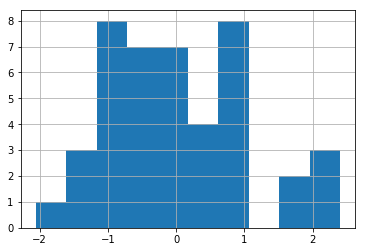

In [91]:
scaled_size.hist()

In [92]:
scaled_size.mean()

-2.2720843294654367e-16

In [93]:
boston["normalized_total_sf"] = scaled_size

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OneHotEncoder.fit_transform

In [ ]:
≈
print(scaler.fit_transform(boston[['1stFlrSF']]))
#scaled_size = pd.Series(scale(boston.total_sf))
#scaled_size.hist()
#scaled_size.mean()
#scaled_size.std(ddof=0)
#boston["normalized_total_sf"] = scaled_size

In [33]:
scaler = MinMaxScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))

[[0.26352941]
 [0.58196078]
 [0.31372549]
 [0.34588235]
 [0.49019608]
 [0.21647059]
 [0.92078431]
 [0.46039216]
 [0.39372549]
 [0.43686275]
 [0.40784314]
 [0.51921569]
 [0.30745098]
 [0.76392157]
 [0.57490196]
 [0.26196078]
 [0.37960784]
 [0.60862745]
 [0.46588235]
 [0.64235294]
 [0.50039216]
 [0.46117647]
 [1.        ]
 [0.42352941]
 [0.42352941]
 [0.84705882]
 [0.29803922]
 [0.92862745]
 [0.84705882]
 [0.        ]
 [0.10117647]
 [0.55529412]
 [0.56      ]
 [0.9254902 ]
 [0.81647059]
 [0.48      ]
 [0.45254902]
 [0.60941176]
 [0.42117647]
 [0.49568627]
 [0.63058824]
 [0.63372549]
 [0.2854902 ]]


/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Other preprocessing / normalization techniques and thoughts
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [97]:
boston["CentralAir"] == "Y"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39    False
40     True
41     True
42     True
Name: CentralAir, dtype: bool

In [34]:
#boston.head()
import numpy as np

# boston["1stFlrSF"].mean(skipna=False)
boston["CentralAir_bool"] = boston["CentralAir"] == "1"


CategoricalDtype(categories=['AdjLand', 'Partial', 'abnormal', 'normal'], ordered=False)

In [99]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 12 columns):
Id                       43 non-null int64
LotFrontage              43 non-null float64
CentralAir               43 non-null object
1stFlrSF                 43 non-null int64
SalePrice                43 non-null int64
2ndFlrSF                 43 non-null int64
SaleCondition_AdjLand    43 non-null uint8
SaleCondition_Normal     43 non-null uint8
SaleCondition_Partial    43 non-null uint8
total_sf                 43 non-null int64
normalized_total_sf      43 non-null float64
CentralAir_bool          43 non-null bool
dtypes: bool(1), float64(2), int64(5), object(1), uint8(3)
memory usage: 4.4+ KB


In [100]:
# boston.head()
# boston["SaleCondition"].dtype
#boston["SaleCondition"].head()
boston["SaleCondition"].astype("category").dtype
#boston["SaleCondition"] = boston["SaleCondition"].astype("category")
#boston["SaleCondition"].dtype

KeyError: 'SaleCondition'

In [101]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(['yes', 'yes', 'no', 'no'])          

array([[1],
       [1],
       [0],
       [0]])

In [102]:
lb.fit_transform(['yes', 'yes', 'no', 'no', 'maybe'])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [103]:
ohe = OneHotEncoder()
sparse_matrix = ohe.fit_transform(boston[['CentralAir_bool']])
sparse_matrix.todense()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

### Another example of categorical data conversion to boolean features

In [111]:
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  ['Green','Red','Blue','Blue','Green','Red','Green']], ).T
x.columns = ['A', 'B', 'C', 'D', 'E']
x

,A,B,C,D,E
0,0,2,0.1,100,Green
1,1,NaN,0.12,120,Red
2,2,7,0.11,NaN,Blue
3,3,4,0.15,127,Blue
4,4,9,0.16,130,Green
5,5,1,0.11,121,Red
6,6,3,0.14,124,Green


In [113]:
x_cat = x.copy()
for val in x['E'].unique():
    x_cat['E_{0}'.format(val)] = x_cat['E'] == val
x_cat

,A,B,C,D,E,E_Green,E_Red,E_Blue
0,0,2,0.1,100,Green,True,False,False
1,1,NaN,0.12,120,Red,False,True,False
2,2,7,0.11,NaN,Blue,False,False,True
3,3,4,0.15,127,Blue,False,False,True
4,4,9,0.16,130,Green,True,False,False
5,5,1,0.11,121,Red,False,True,False
6,6,3,0.14,124,Green,True,False,False


In [114]:
# Another option to have one feature per color is to use Pivot
# Note that it will create missing data:
x.pivot(index='A', columns='E', values='C')

E,Blue,Green,Red
A,,,
0,NaN,0.1,NaN
1,NaN,NaN,0.12
2,0.11,NaN,NaN
3,0.15,NaN,NaN
4,NaN,0.16,NaN
5,NaN,NaN,0.11
6,NaN,0.14,NaN


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* ~~Data are of correct type (e.g. categorical vs continuous, boolean vs int)~~

## Other types of data storage
* Image
* Text

### Image

Datasets with images also need to follow samples-by-features format.
Features in this case are pixels and their intensities. For black and white images intensities are binary. For grayscale they could be integer or floating point numbers. Color images are usually represented as multiple images - one for each color channel (e.g. red / green / blue).

Thus each image is represented as a one dimensional array, which is exactly what's needed for ML applications. To visualize it, however, we need to change its shape.

In [115]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()     
print("Dimensionality samples x features", dataset.data.shape)

# first image - pixel intensities
dataset.data[0]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/chos5/scikit_learn_data
Dimensionality samples x features (400, 4096)


array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [122]:
type(dataset.data)

numpy.ndarray

In [123]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

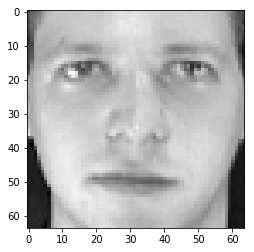

In [116]:
# reshaping to visualize
plt.imshow(dataset.data[0].reshape(64, 64), cmap=plt.cm.gray)

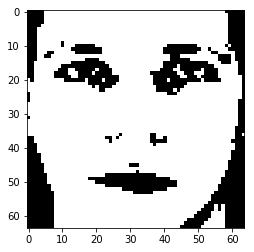

In [117]:
# Example of normalization of an image
from sklearn.preprocessing import Binarizer

image = dataset.data[0].reshape(64, 64)
normalized_image = Binarizer(threshold=0.6).fit_transform(image)
plt.imshow(normalized_image, cmap=plt.cm.gray)

### Text

Text has also to be transformed to samples-by-features format.
In the simplest case each document is a sample and ocurrence of words are its features.

In [124]:
from sklearn.datasets import fetch_20newsgroups
emails = fetch_20newsgroups(subset='train', categories=['sci.med'], shuffle=True, random_state=0)


In [125]:
print(emails.target_names)

['sci.med']


In [126]:
type(emails.target_names)

list

In [127]:
print("Number of documents", len(emails.data))
print("Beginning of the first document", emails.data[0][:500])

Number of documents 594
Beginning of the first document From: ron.roth@rose.com (ron roth)
Subject: HYPOGLYCEMIA
X-Gated-By: Usenet <==> RoseMail Gateway (v1.70)
Organization: Rose Media Inc, Toronto, Ontario.
Lines: 31

     anello@adcs00.fnal.gov (Anthony Anello) writes:

A(>  Can anyone tell me if a bloodcount of 40 when diagnosed as hypoglycemic is
A(>  dangerous, i.e. indicates a possible pancreatic problem?  One Dr. says no, the
A(>  other (not his specialty) says the first is negligent and that another blood
A(>  test should be done.  Also, wh


In [128]:
# For every document we count word ocurrence:

from sklearn.feature_extraction.text import CountVectorizer
emails_in_ML_format = CountVectorizer().fit_transform(emails.data)
print(emails_in_ML_format.shape)

(594, 16257)


In [129]:
# Now this is how the first document looks like:
emails_in_ML_format[0].todense()

matrix([[1, 0, 0, ..., 0, 0, 0]])